In [22]:
import streamlit as st
from datetime import date
import yfinance as yf
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from plotly import graph_objs as go
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
start = "2015-01-01"
today = date.today().strftime("%Y-%m-%d")

#st.title("Stock Prediction")

stock_list = ["RELIANCE"]

stock = stock_list[0]

n_days = 100

def load_data(ticker) :
    data = yf.download(ticker+'.NS',start,today)
    data.reset_index(inplace=True)
    return data



period = int(n_days)

data = load_data(stock)

df_train = data[['Date','Close']]
df_train = df_train.iloc[:(-1*n_days),]
df_train = df_train.rename(columns={"Date":"ds", "Close":"y"})

[*********************100%***********************]  1 of 1 completed


In [31]:
m = Prophet()
m.fit(df_train)
future = m.make_future_dataframe(periods=period)
forecast = m.predict(future)

2021-05-04 15:50:17.784 INFO    fbprophet: Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
df_train.tail()

,ds,y
1454,2020-11-26,1952.599976
1455,2020-11-27,1929.800049
1456,2020-12-01,1954.900024
1457,2020-12-02,1958.150024
1458,2020-12-03,1964.050049


In [55]:
forecast.tail(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1544,2021-02-27,2251.478076,2084.139170,2338.066298,2243.024023,2261.875527,-47.170389,-47.170389,-47.170389,-9.430048,-9.430048,-9.430048,-37.740341,-37.740341,-37.740341,0.0,0.0,0.0,2204.307688
1545,2021-02-28,2253.457878,2074.380339,2334.104968,2244.812641,2264.043050,-49.142044,-49.142044,-49.142044,-9.430047,-9.430047,-9.430047,-39.711997,-39.711997,-39.711997,0.0,0.0,0.0,2204.315834
1546,2021-03-01,2255.437679,2095.232198,2345.618447,2246.579574,2266.214623,-38.617345,-38.617345,-38.617345,3.355322,3.355322,3.355322,-41.972667,-41.972667,-41.972667,0.0,0.0,0.0,2216.820334
1547,2021-03-02,2257.417480,2086.574607,2345.074076,2248.383215,2268.546949,-39.637703,-39.637703,-39.637703,4.877332,4.877332,4.877332,-44.515036,-44.515036,-44.515036,0.0,0.0,0.0,2217.779776
1548,2021-03-03,2259.397281,2074.199073,2348.827643,2250.287957,2270.728612,-45.533638,-45.533638,-45.533638,1.791211,1.791211,1.791211,-47.324850,-47.324850,-47.324850,0.0,0.0,0.0,2213.863642
1549,2021-03-04,2261.377082,2086.130598,2341.153216,2251.987607,2273.067719,-46.414215,-46.414215,-46.414215,3.966885,3.966885,3.966885,-50.381100,-50.381100,-50.381100,0.0,0.0,0.0,2214.962866
1550,2021-03-05,2263.356883,2082.334381,2355.474837,2253.793495,2275.235912,-48.787022,-48.787022,-48.787022,4.869344,4.869344,4.869344,-53.656366,-53.656366,-53.656366,0.0,0.0,0.0,2214.569861
1551,2021-03-06,2265.336684,2070.200194,2331.735396,2255.592327,2277.439149,-66.547365,-66.547365,-66.547365,-9.430048,-9.430048,-9.430048,-57.117317,-57.117317,-57.117317,0.0,0.0,0.0,2198.789319
1552,2021-03-07,2267.316485,2067.033567,2328.516107,2257.418273,2279.662813,-70.155400,-70.155400,-70.155400,-9.430047,-9.430047,-9.430047,-60.725353,-60.725353,-60.725353,0.0,0.0,0.0,2197.161085
1553,2021-03-08,2269.296286,2082.007396,2343.500054,2259.312592,2281.968663,-61.082058,-61.082058,-61.082058,3.355322,3.355322,3.355322,-64.437380,-64.437380,-64.437380,0.0,0.0,0.0,2208.214228


In [34]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1554,2021-04-27,1940.000000,1997.199951,1938.250000,1988.650024,1988.650024,9226547
1555,2021-04-28,1997.849976,2008.000000,1980.150024,1997.300049,1997.300049,7902002
1556,2021-04-29,2022.900024,2044.500000,2007.300049,2024.050049,2024.050049,8035915
1557,2021-04-30,2008.500000,2036.000000,1987.550049,1994.500000,1994.500000,9150974
1558,2021-05-03,1966.000000,1979.000000,1943.099976,1959.050049,1959.050049,10909942


In [44]:
data2 = data[-100:]

In [51]:
print(data.shape)
print(data2.shape) 
print(df_train.shape)
print(forecast.shape)

(1559, 7)
(100, 7)
(1459, 2)
(1559, 19)


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None)

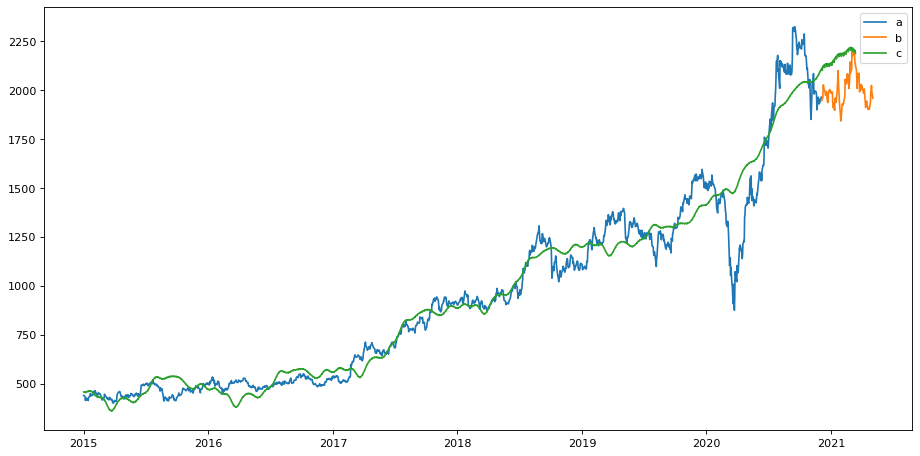

In [52]:
plt.figure(figsize=[14,7],dpi=80)
plt.plot(df_train['ds'],df_train['y'])
plt.plot(data2['Date'],data2['Close'])
plt.plot(forecast['ds'],forecast['yhat'])
plt.legend(['a','b','c'])
st.pyplot(plt)

In [56]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_train['ds'], y=df_train['y'],
                    mode='lines',
                    name='Past'))
fig.add_trace(go.Scatter(x=data2['Date'], y=data2['Close'],
                    mode='lines',
                    name='Real'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'],
                    mode='lines', 
                    name='Predicted'))
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()